# AAI-510 M1 Lab Walkthrough — Graphical analysis for ML

In machine learning, the algorithms are just the tools, the raw material is the data - it's the ore that makes the gold. Thus, to build useful models, one needs to get intimate with data — it's strengths, flaws, nuances, patterns, cycles, etc. Graphical data analysis is much more than mere visualization.



## Ploting Libraries in Python

Python has many graphical analysis libraries: Matplotlib, Plotly, Bokeh, ggplot2, Seaborn, Altair, etc. Here are a few popular ones and their strengths:

>**Matplotlib** is a popular plotting package that is being continuously developed. It offers numerous rendering backends and uses a verbose syntax, giving plots a high degree of flexibility and customizability. Consider Matplotlib on top of pandas if you want to have full control over your visualizations.

>**Pandas** the Python library that provides a concise way to manipulate data in tabular format also has built-in plotting methods that use Matplotlib underneeth. Consider only pandas if you want to manipulate your data and quickly build visualizations with no in-depth control over the visualization itself.

>**Plotly** is a partly open-source analysis and visualization tool with support for web based, 3D, and animated plots. It creates interactive charts for web browsers and supports multiple languages, such as Python, Julia, R, and MATLAB. Consider Plotly if you want to display your interactive data visualizations on the web or use other programming languages in addition to Python.

>**Seaborn** is a Python plotting library built on top of Matplotlib that integrates heavily with pandas. Unlike matplotlib, you can avoid specifying numerous styling parameters and still get graphs that look good out of the box. Consider seaborn if you want to quickly create plots, especially statistical plots with more attractive default styles.





## Seaborn vs. Matplotlib
[Seaborn](http://seaborn.pydata.org/) is a Python library for ploting and analyzing data. Starting with seaborn has advantages:
* It integrates closely with *pandas* data structures (`DataFrame`).
* You can focus on what your plots means rather than on the details of how to draw them.
* It provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn.

Note: that all of the following *could* be done using raw Matplotlib commands.

**The Basic Structure of a Seaborn Plot:**

`seaborn.plot(data, x-variable, y-variable, hue) #hue is the 'by' variable to subgroup data`

## Importing the seaborn library
By convention, seaborn is imported with the shorthand 'sns'. Seaborn includes a few example datasets. Let's import seaborn and load a dataset to start plotting. spellling

In [5]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt #to allow subplot creation

# Apply the seaborn theme
sns.set_theme() #overwrite default Matplotlib styling parameters

#List the example datasets available in seaborn
names = sns.get_dataset_names()
print("\r\nDatasets in Seaborn: \r\n",names,"\r\n")

# Load data and print dataframe shape
df = sns.load_dataset('titanic')
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show the dataframe
df


Datasets in Seaborn: 
 ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'] 

Shape of the dataframe (row, col): (891, 15) 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Univariate Analysis: analysis of one variable

### Univariate Plots — types and uses
1.   Continuous Data (Examples: time, weight, speed, etc.)
  *   [Boxplot](#scrollTo=2ck15EcaZUol&line=1&uniqifier=1) — used to identify outliers and assymetric distributions.
  *   [Strip Plot](#scrollTo=qjvANMpgcFPK&line=1&uniqifier=1)(AKA Jitter Plot) — used to see raw data, often with a Boxplot.
   *   [Histogram](#scrollTo=MDldQKmQa-Db&line=1&uniqifier=1) — used to identify outliers and multi-modal data or high peaks.
  *   [KDE Plot](#scrollTo=ORlIP4rbb7RJ&line=1&uniqifier=1) — Kernel Distribution Estimate of the probability density function — can be misleading in some cases as it's an *estimate*.
  *   [Violin plot](#scrollTo=JR_qYijKbWy1&line=1&uniqifier=1) — a smoothed Boxplot with KDE — same caution as above.

2.   Categorical Data (Examples: gender, race, batch, etc.)
  *   [Countplot](#scrollTo=i17xUycpgJx0&line=1&uniqifier=1) (AKA Bar Chart) — used to identify unique levels, count of levels, blanks, coded identifiers such as N/A, 999, etc.






### Boxplot
Used to identify outliers and assymetric distributions. The anotomy of a box plot is shown below.
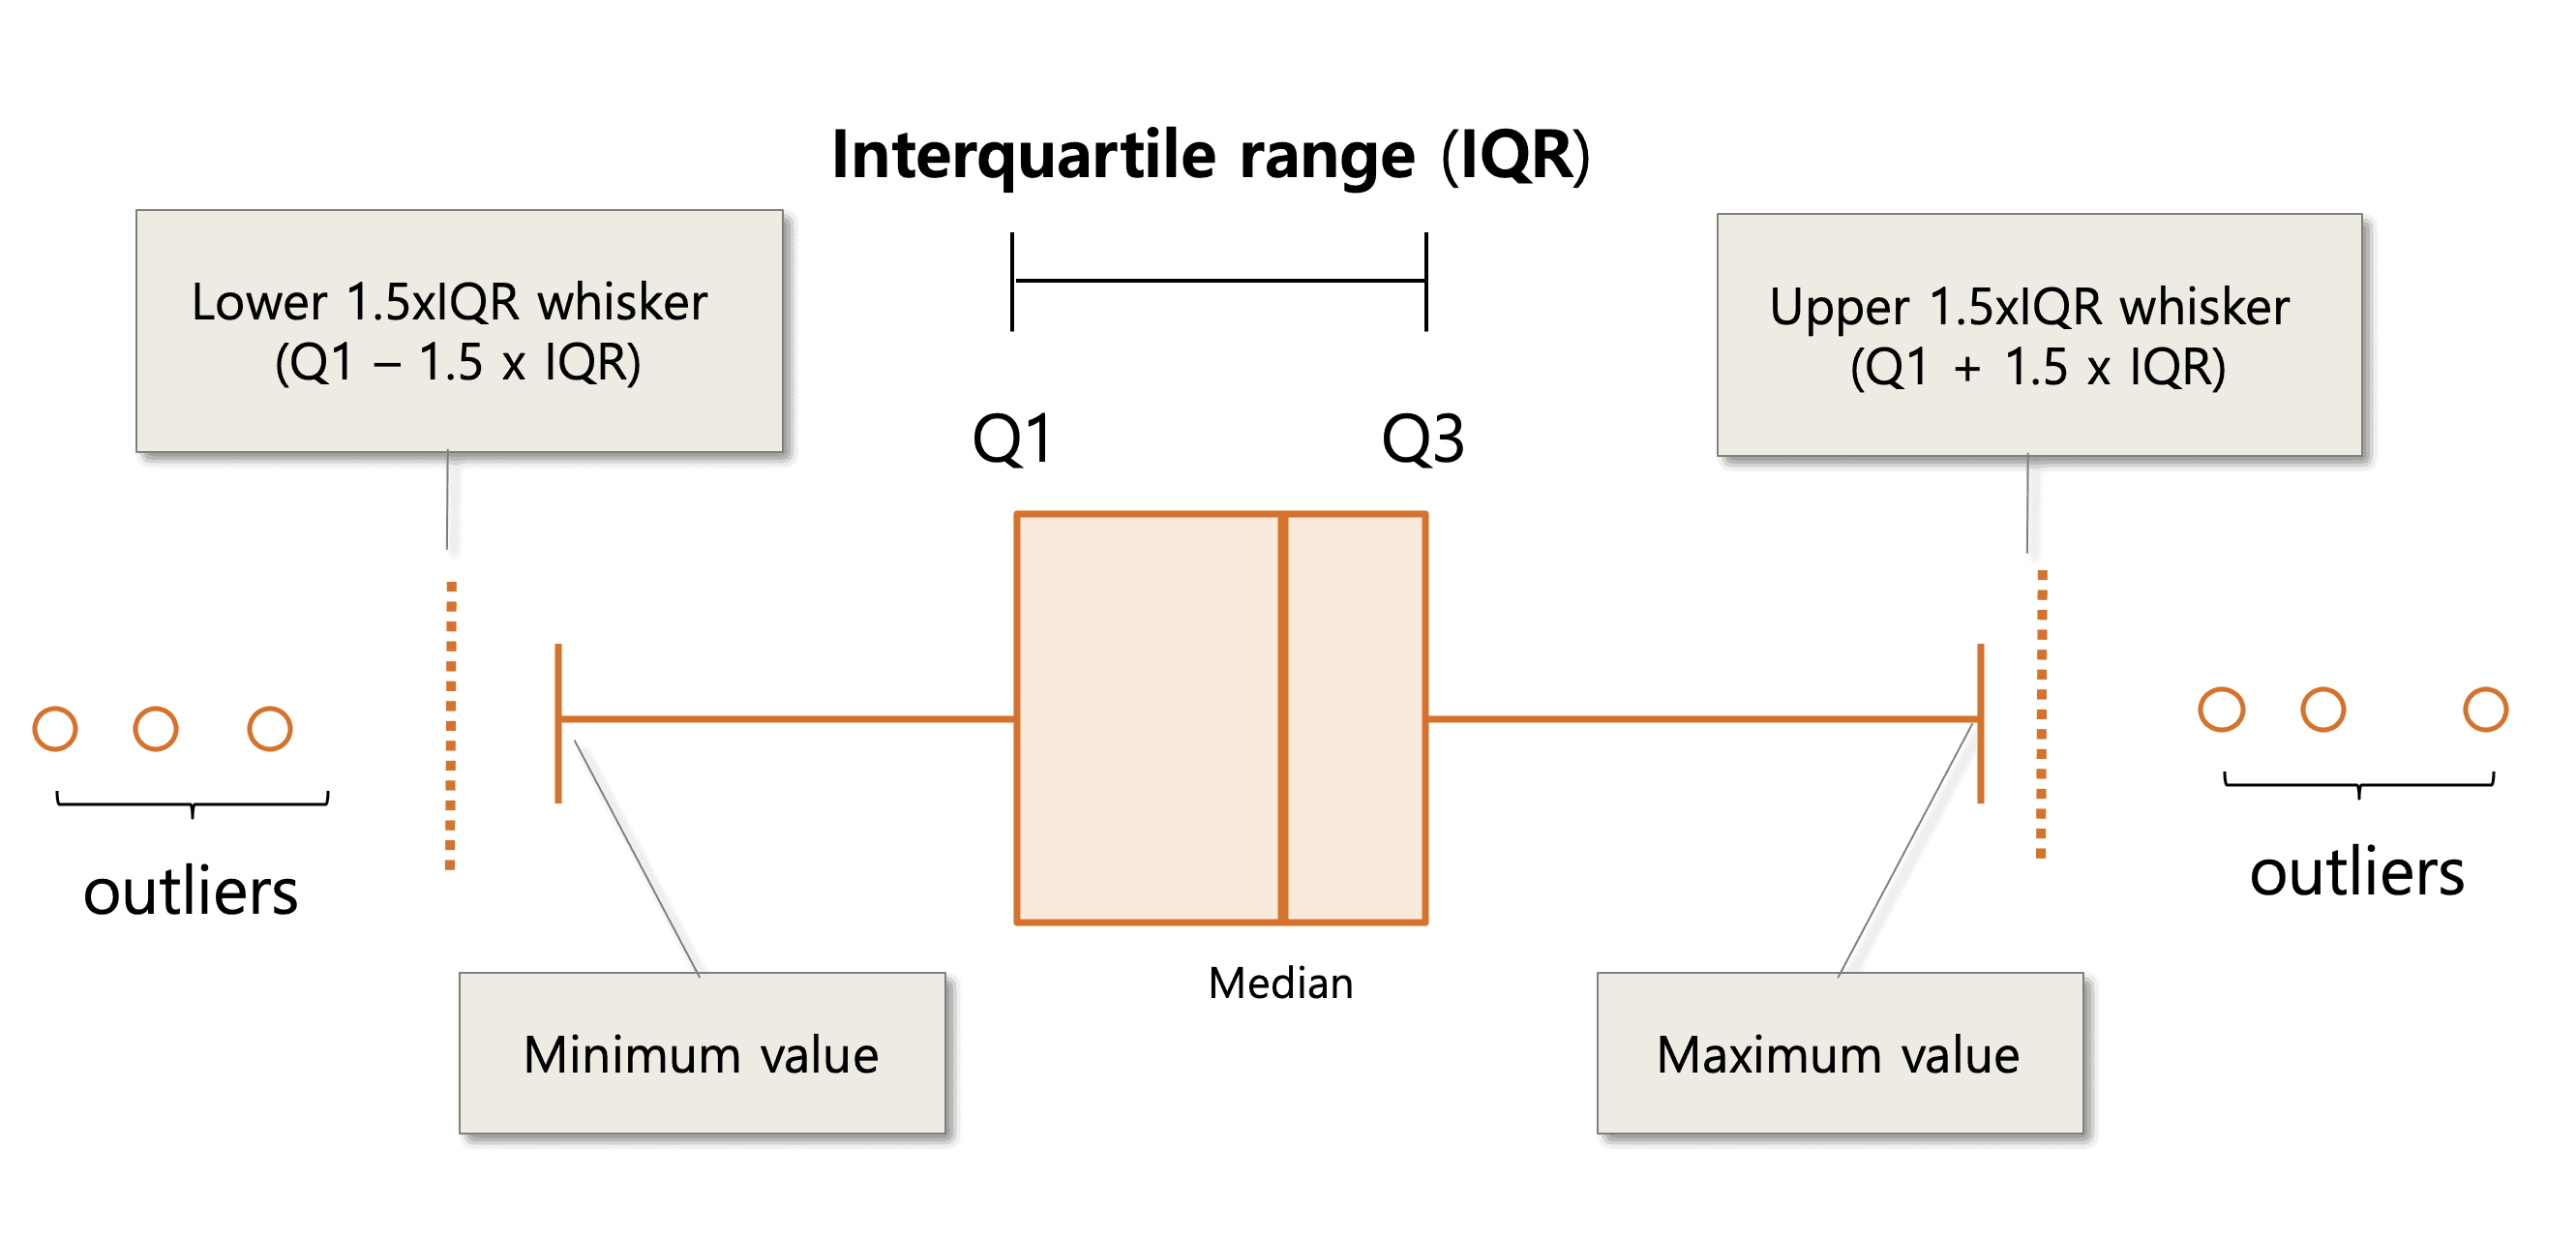

<Axes: xlabel='fare'>

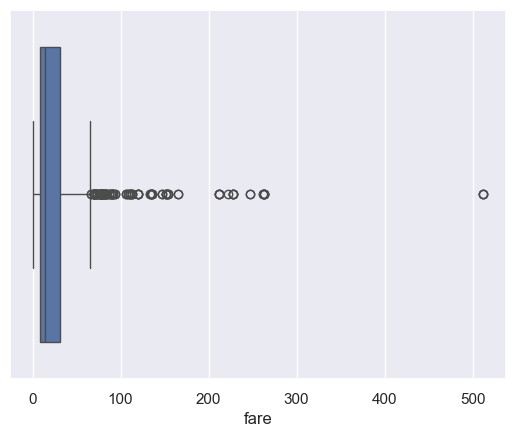

In [6]:
sns.boxplot(data=df, x='fare') # Call boxplot for the 'fare' column

### Strip Plot (AKA Jitter Plot)

<Axes: xlabel='fare'>

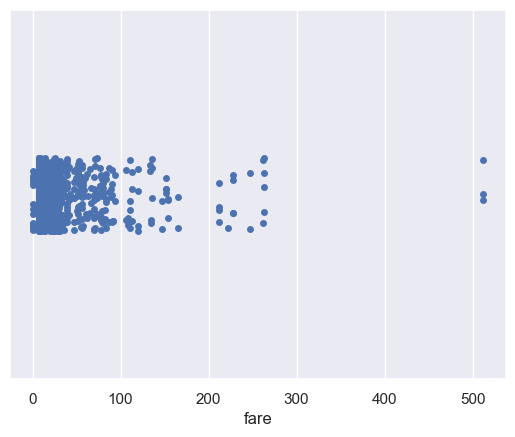

In [7]:
sns.stripplot(data=df, x='fare') # Call stripplot for the 'fare' column

*Overlaying plots for more information*

<Axes: xlabel='fare'>

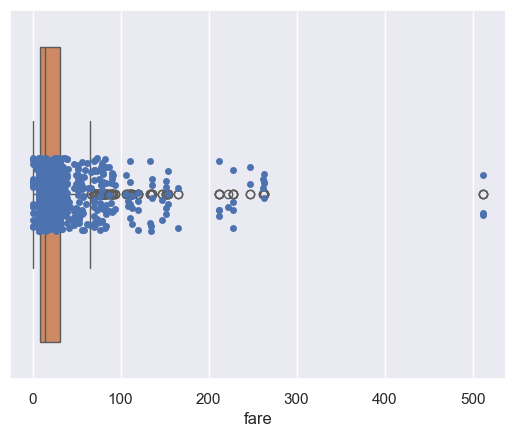

In [8]:
# Call stripplot and then boxplot — seaborn hold on to the latest axes for a subsequent compatible plot
sns.stripplot(data=df, x='fare') # Call stripplot for the 'fare' column
sns.boxplot(data=df, x='fare') # Call boxplot for the 'fare' column

### Histogram
Used to identify outliers and multi-modal data or high peaks





<Axes: xlabel='fare', ylabel='Count'>

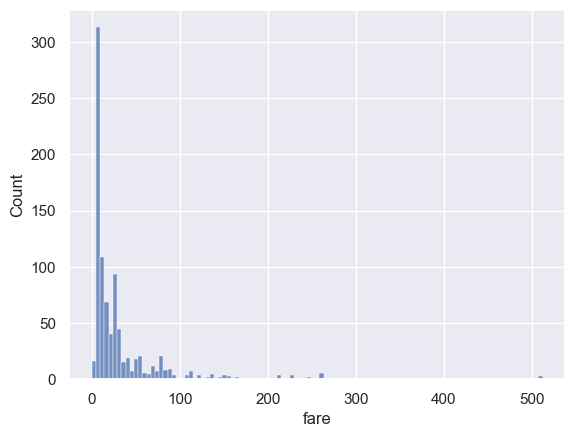

In [9]:
sns.histplot(data=df, x='fare') # Call histplot for the 'fare' column.
# Notice how the y-axis label is automatically generated as 'count'

Note: by passing the 'stat' parameter, the y-axis scale can be adjusted so,
* count: show the number of observations in each bin
* frequency: show the number of observations divided by the bin width
* probability or proportion: normalize such that bar heights sum to 1
* percent: normalize such that bar heights sum to 100
* density: normalize such that the total area of the histogram equals 1

### KDE Plot

Kernel Distribution Estimate of the probability density function.

**⚠** *NOTE: the KDE will always show you a smooth curve, even when the data themselves are not smooth.*

For example, below is the KDE for fare — it looks smooth. But we saw from the histogram that the data is not smoothly distributed.

<Axes: xlabel='fare', ylabel='Density'>

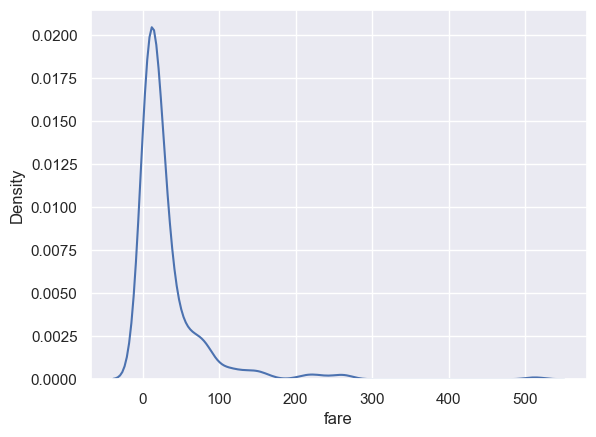

In [10]:
sns.kdeplot(data=df, x='fare')

It is best never to show the KDE by itself; if you have to show it, make sure the histogram is displayed too as shown next.

<Axes: xlabel='fare', ylabel='Count'>

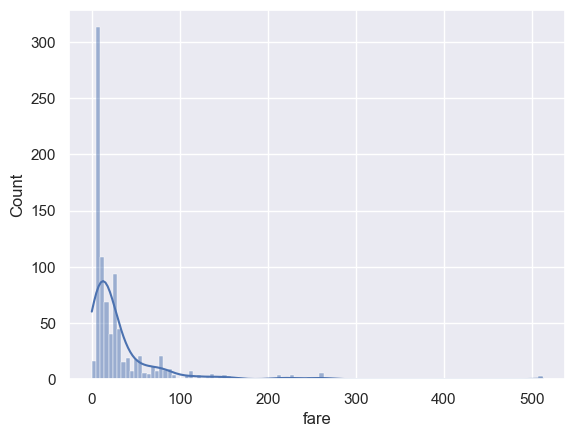

In [11]:
sns.histplot(data=df, x='fare', kde=True) # Call histplot for the 'fare' column — but this time with kde=True

### Violin plot
It's a smoothed Boxplot with KDE

Although visually apealing, this plot has the same problems as the KDE and should be avoided in serious data analysis.

<Axes: xlabel='fare'>

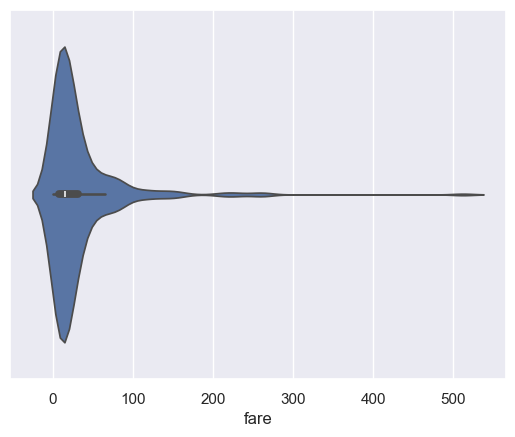

In [12]:
sns.violinplot(data=df, x='fare') # Call violinplot for the 'fare' column.

### Categorical Variable — Countplot (AKA barchart)
A barchart is used to identify unique levels, count of levels, blanks, coded identifiers such as N/A, 999, etc.

<Axes: xlabel='deck', ylabel='count'>

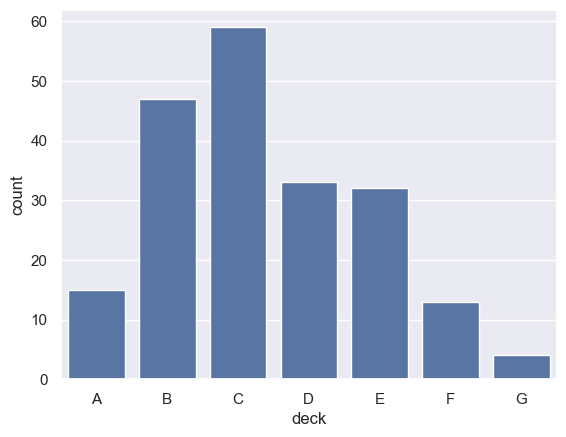

In [13]:
sns.countplot(data=df, x='deck') # Call countplot for the 'deck' column.
# Notice that we did not have to explictly summarize to generate the count

### Using the grouping variable (hue)


``hue`` is the 'by' variable to subgroup data. For example, we can subgroup the histogram of the age data by the column 'who' as shown below.

<Axes: xlabel='age', ylabel='Count'>

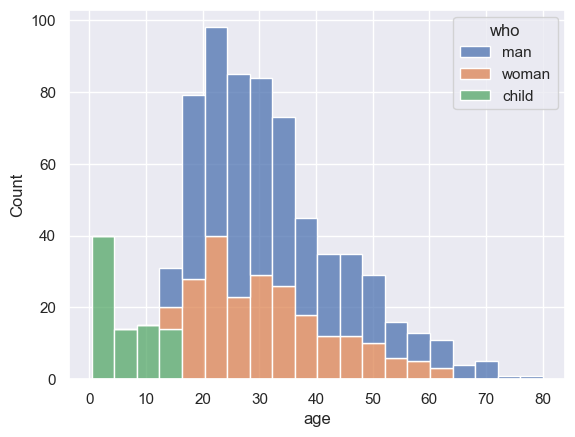

In [14]:
sns.histplot(data=df, x='age', hue='who', multiple='stack') # Call countplot for the 'age' column; but specifying the hue
# multiple='stack' tells histplots that we want the columns to be stacked on top of each other instead of overlaping

## Bivariate Analysis: analysis of two variables

**Bivariate Plots**
1.   Categorical
  *   Line Plot — used to observe a trend; y has to be continious, x can be categgorical or continious
  *   Bar Plot — same as above
  *   Point Plot — same as above
2.   Continuous
  *  Jointplot - a scatterplot with histograms that shows relationship between two continious variables.
  *  Pairplot — plots each continious variable against all other variables in the dataframe and displays results in a grid
      *  helps identify correlated variables and other relationships.





<Axes: xlabel='deck', ylabel='fare'>

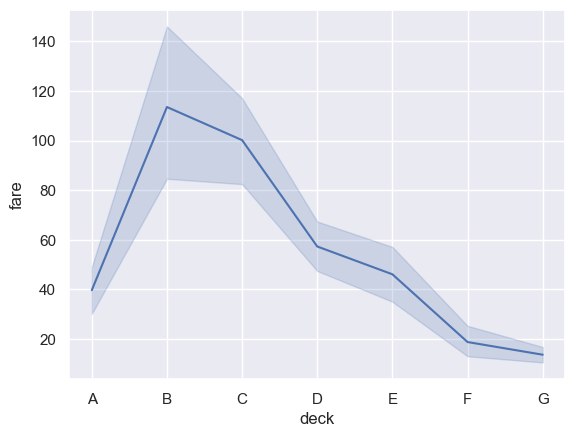

In [15]:
#@title Line plot
sns.lineplot(data=df, x='deck', y='fare')

<Axes: xlabel='deck', ylabel='fare'>

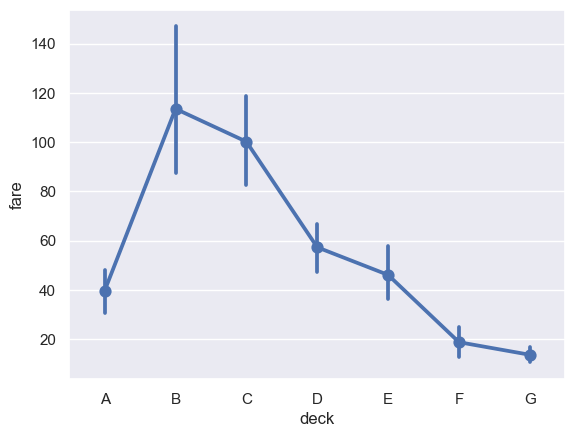

In [16]:
#@title Point plot
sns.pointplot(data=df, x='deck', y='fare')

<Axes: xlabel='deck', ylabel='fare'>

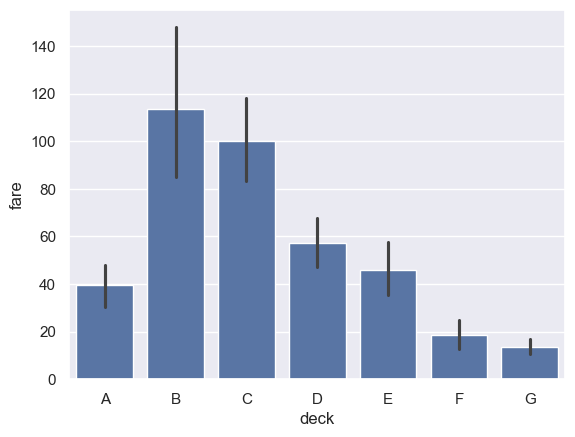

In [17]:
#@title Bar plot
sns.barplot(data=df, x='deck', y='fare')

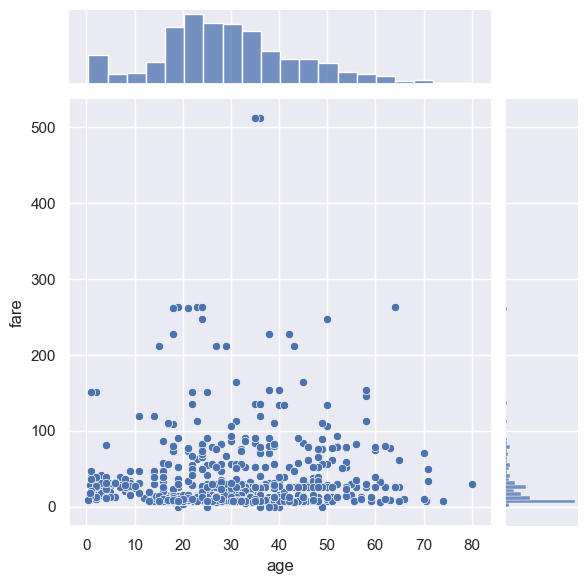

In [18]:
#@title Joint Plot
sns.jointplot(data=df, x='age', y='fare')

## Multivariate Analysis — analysis of multiple variables

Ploting each variable in the frame against all other variables

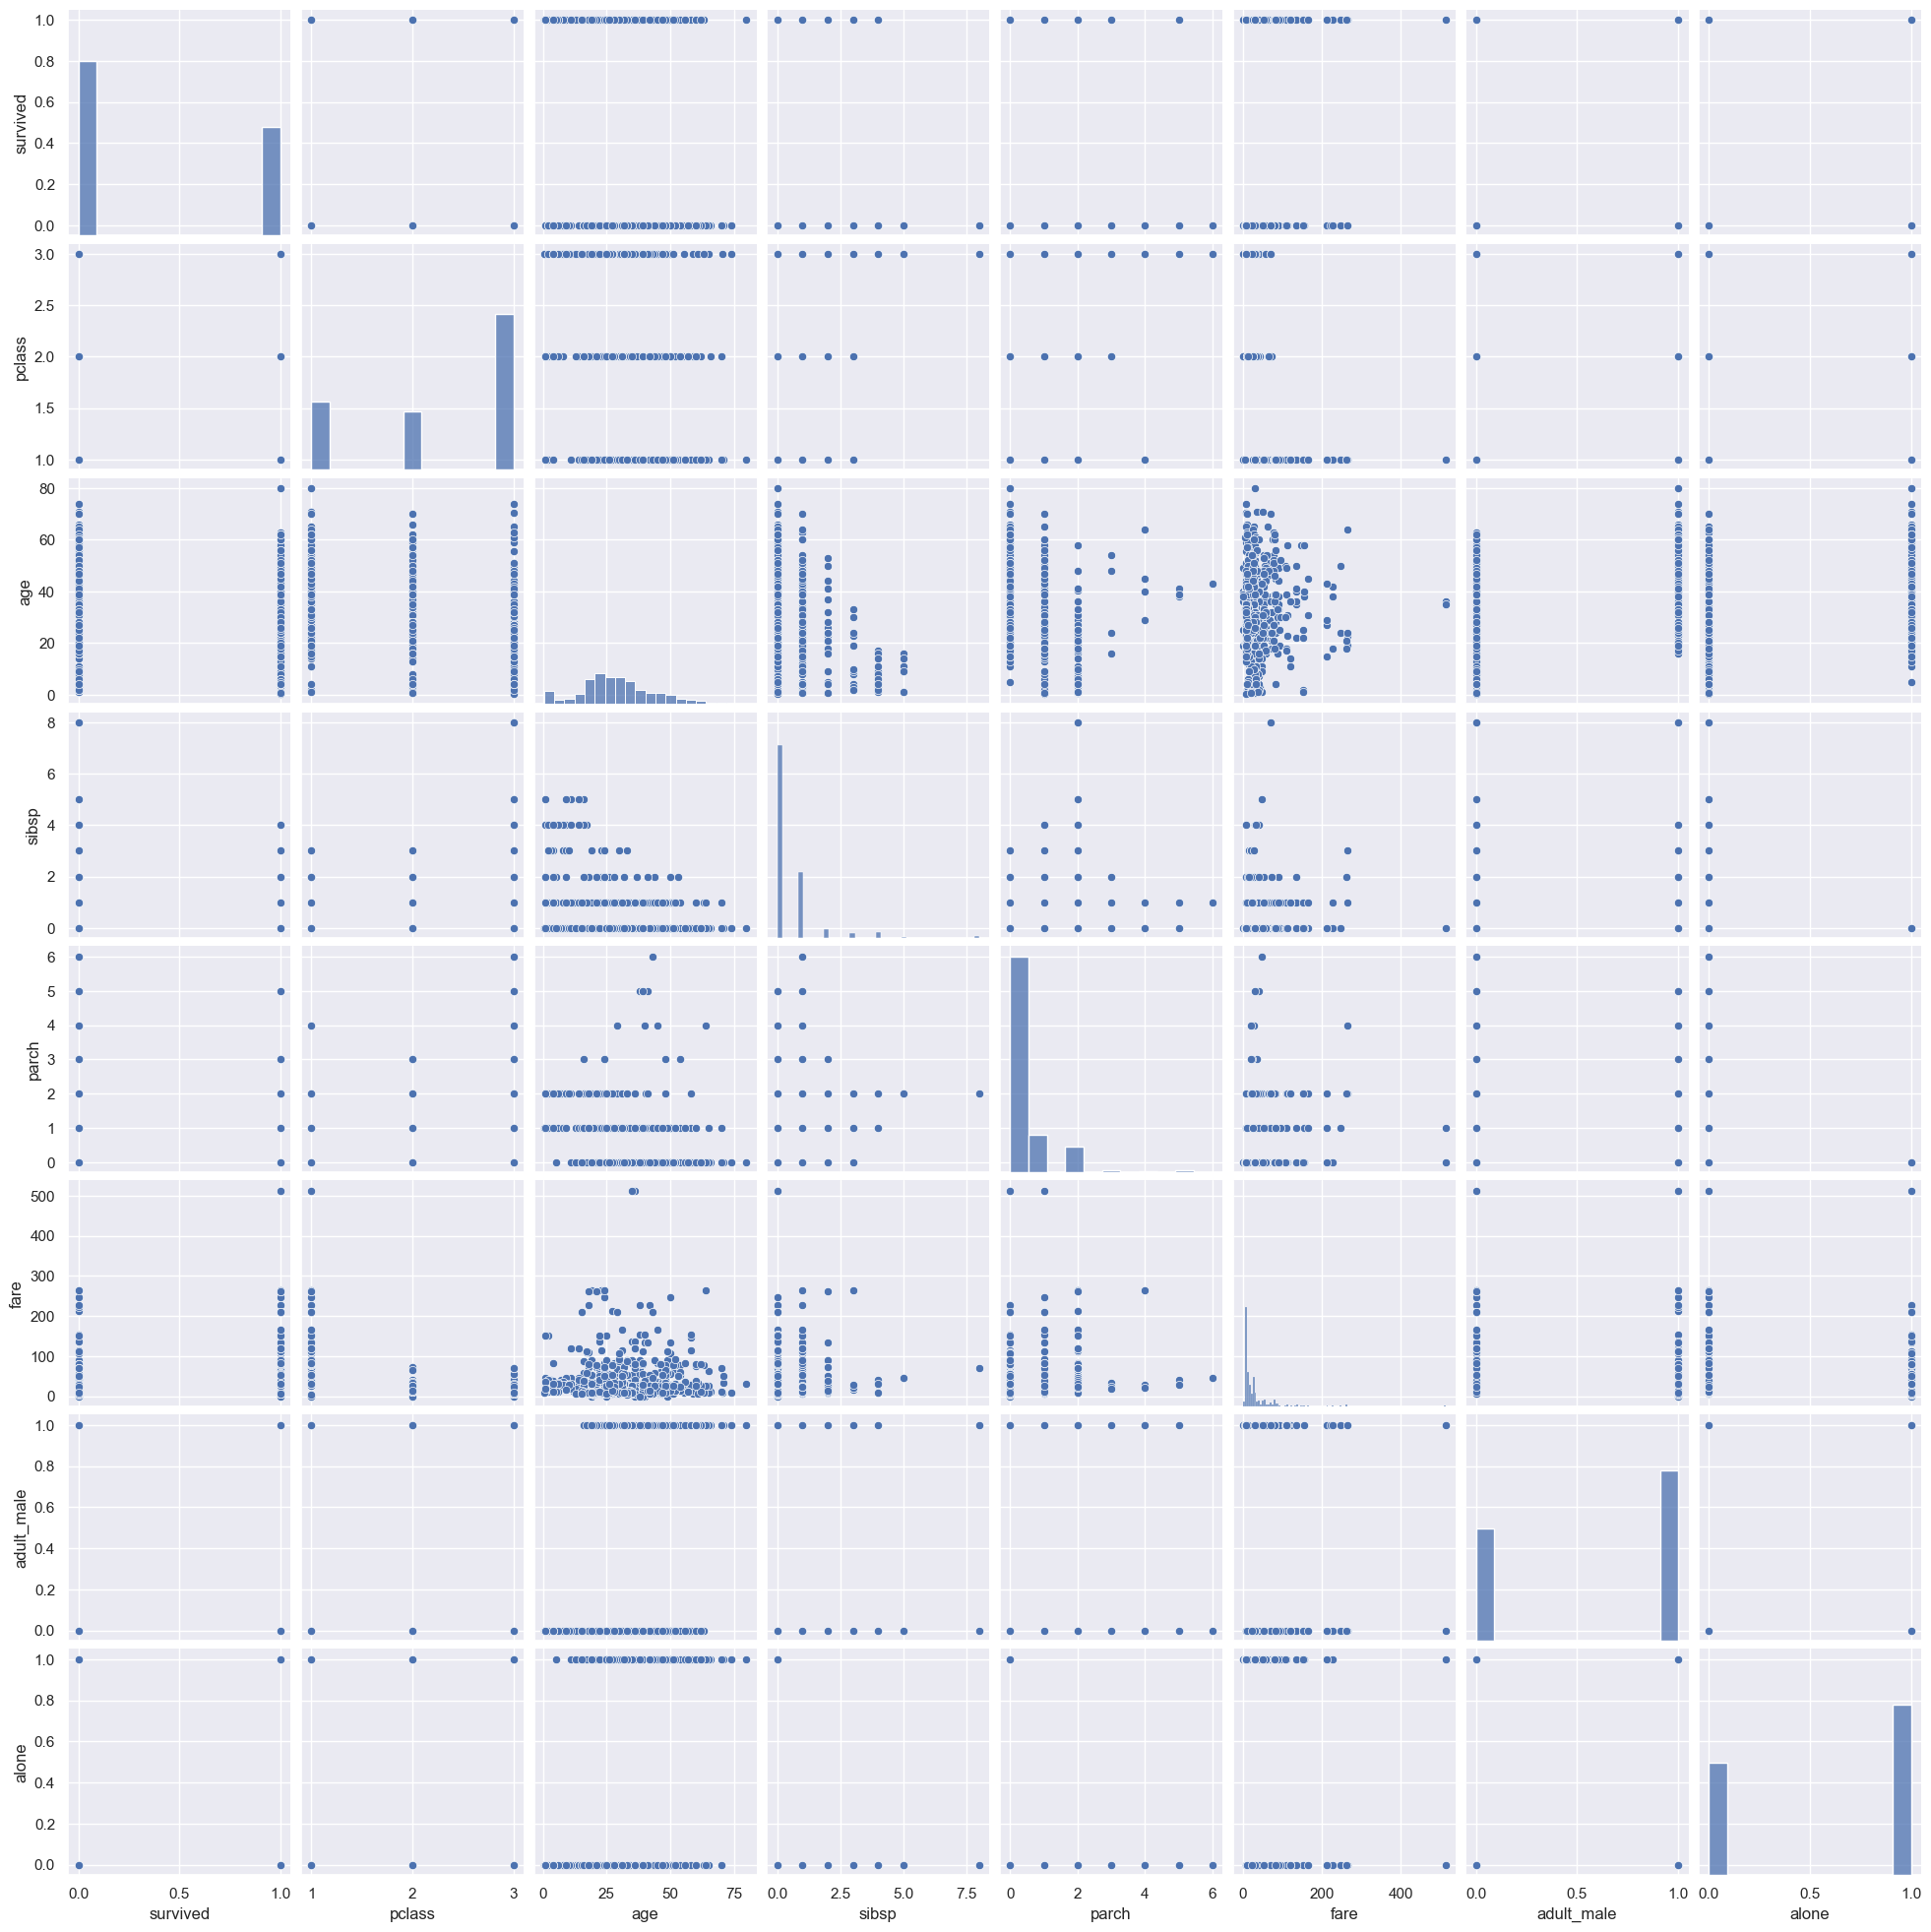

In [19]:
#@title Pair plot
sns.pairplot(df) # Calling pointplot for the entire dataframe

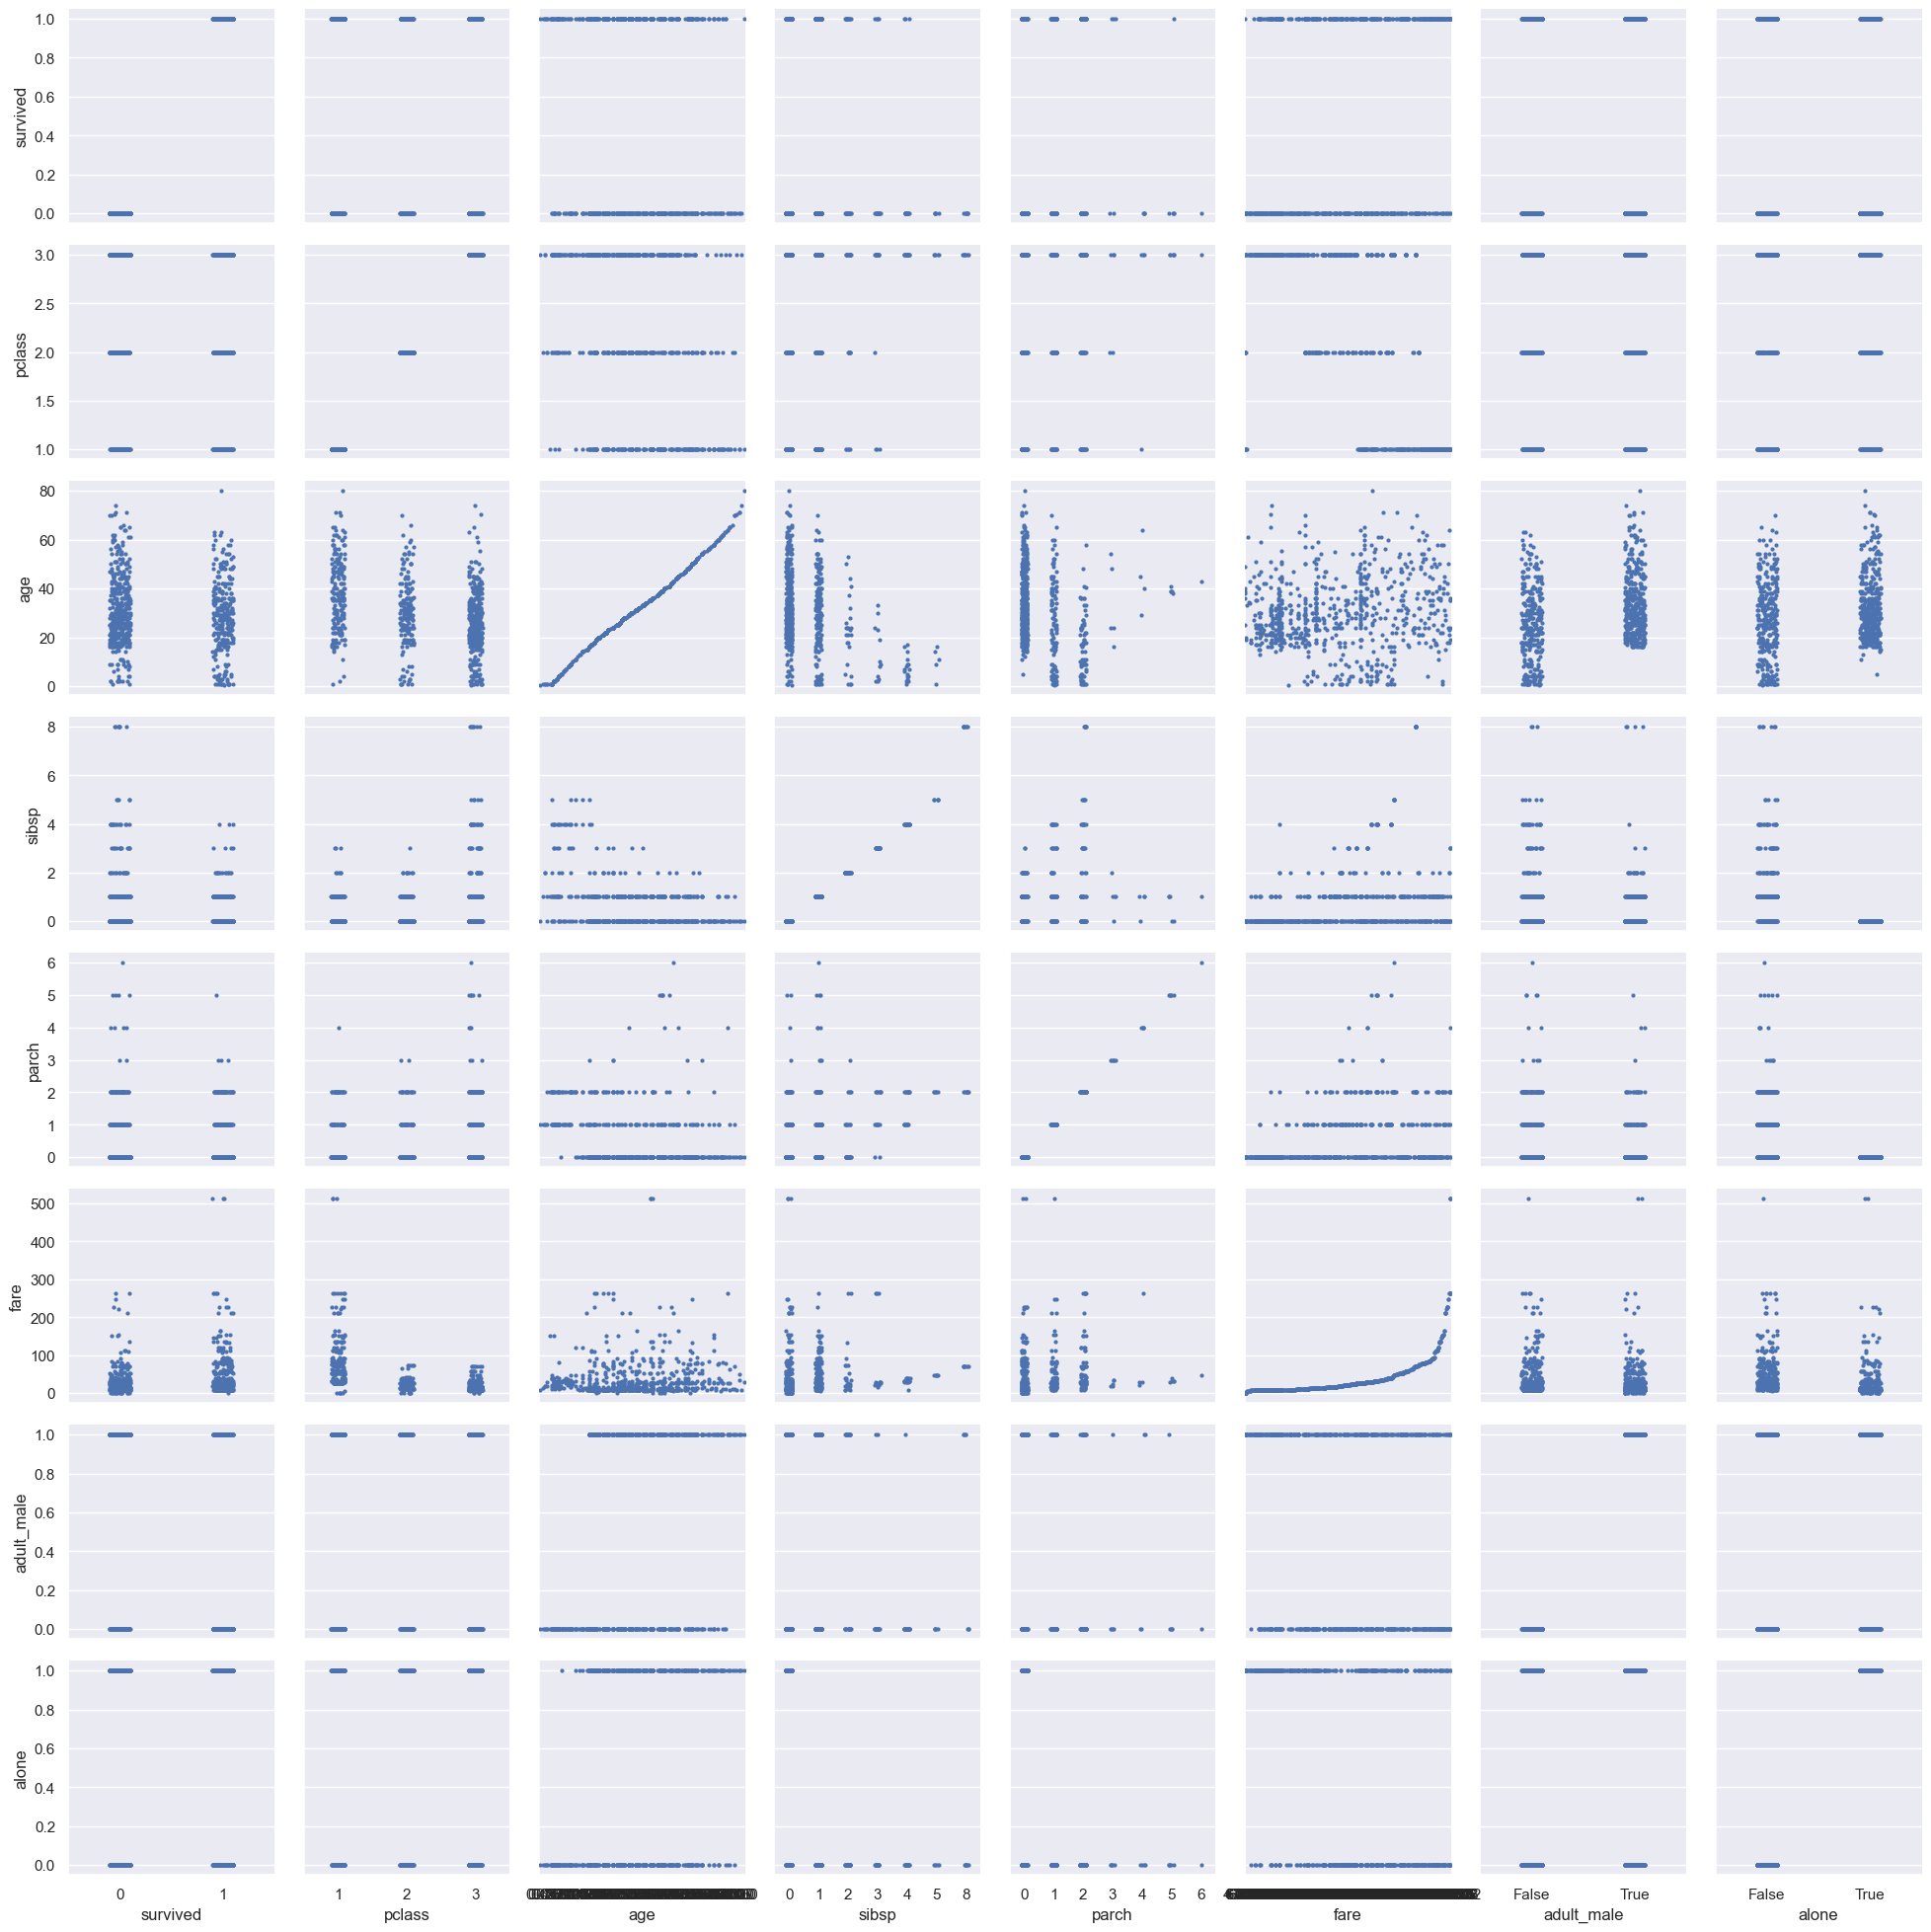

In [20]:
#@title Pair Grid
# PairGrid is used if we want to customize the pairplot

p = sns.PairGrid(df) # Calling pointplot for the entire dataframe
p.map(sns.stripplot, jitter=True, size=3) # Adding jitter by specifying striplot

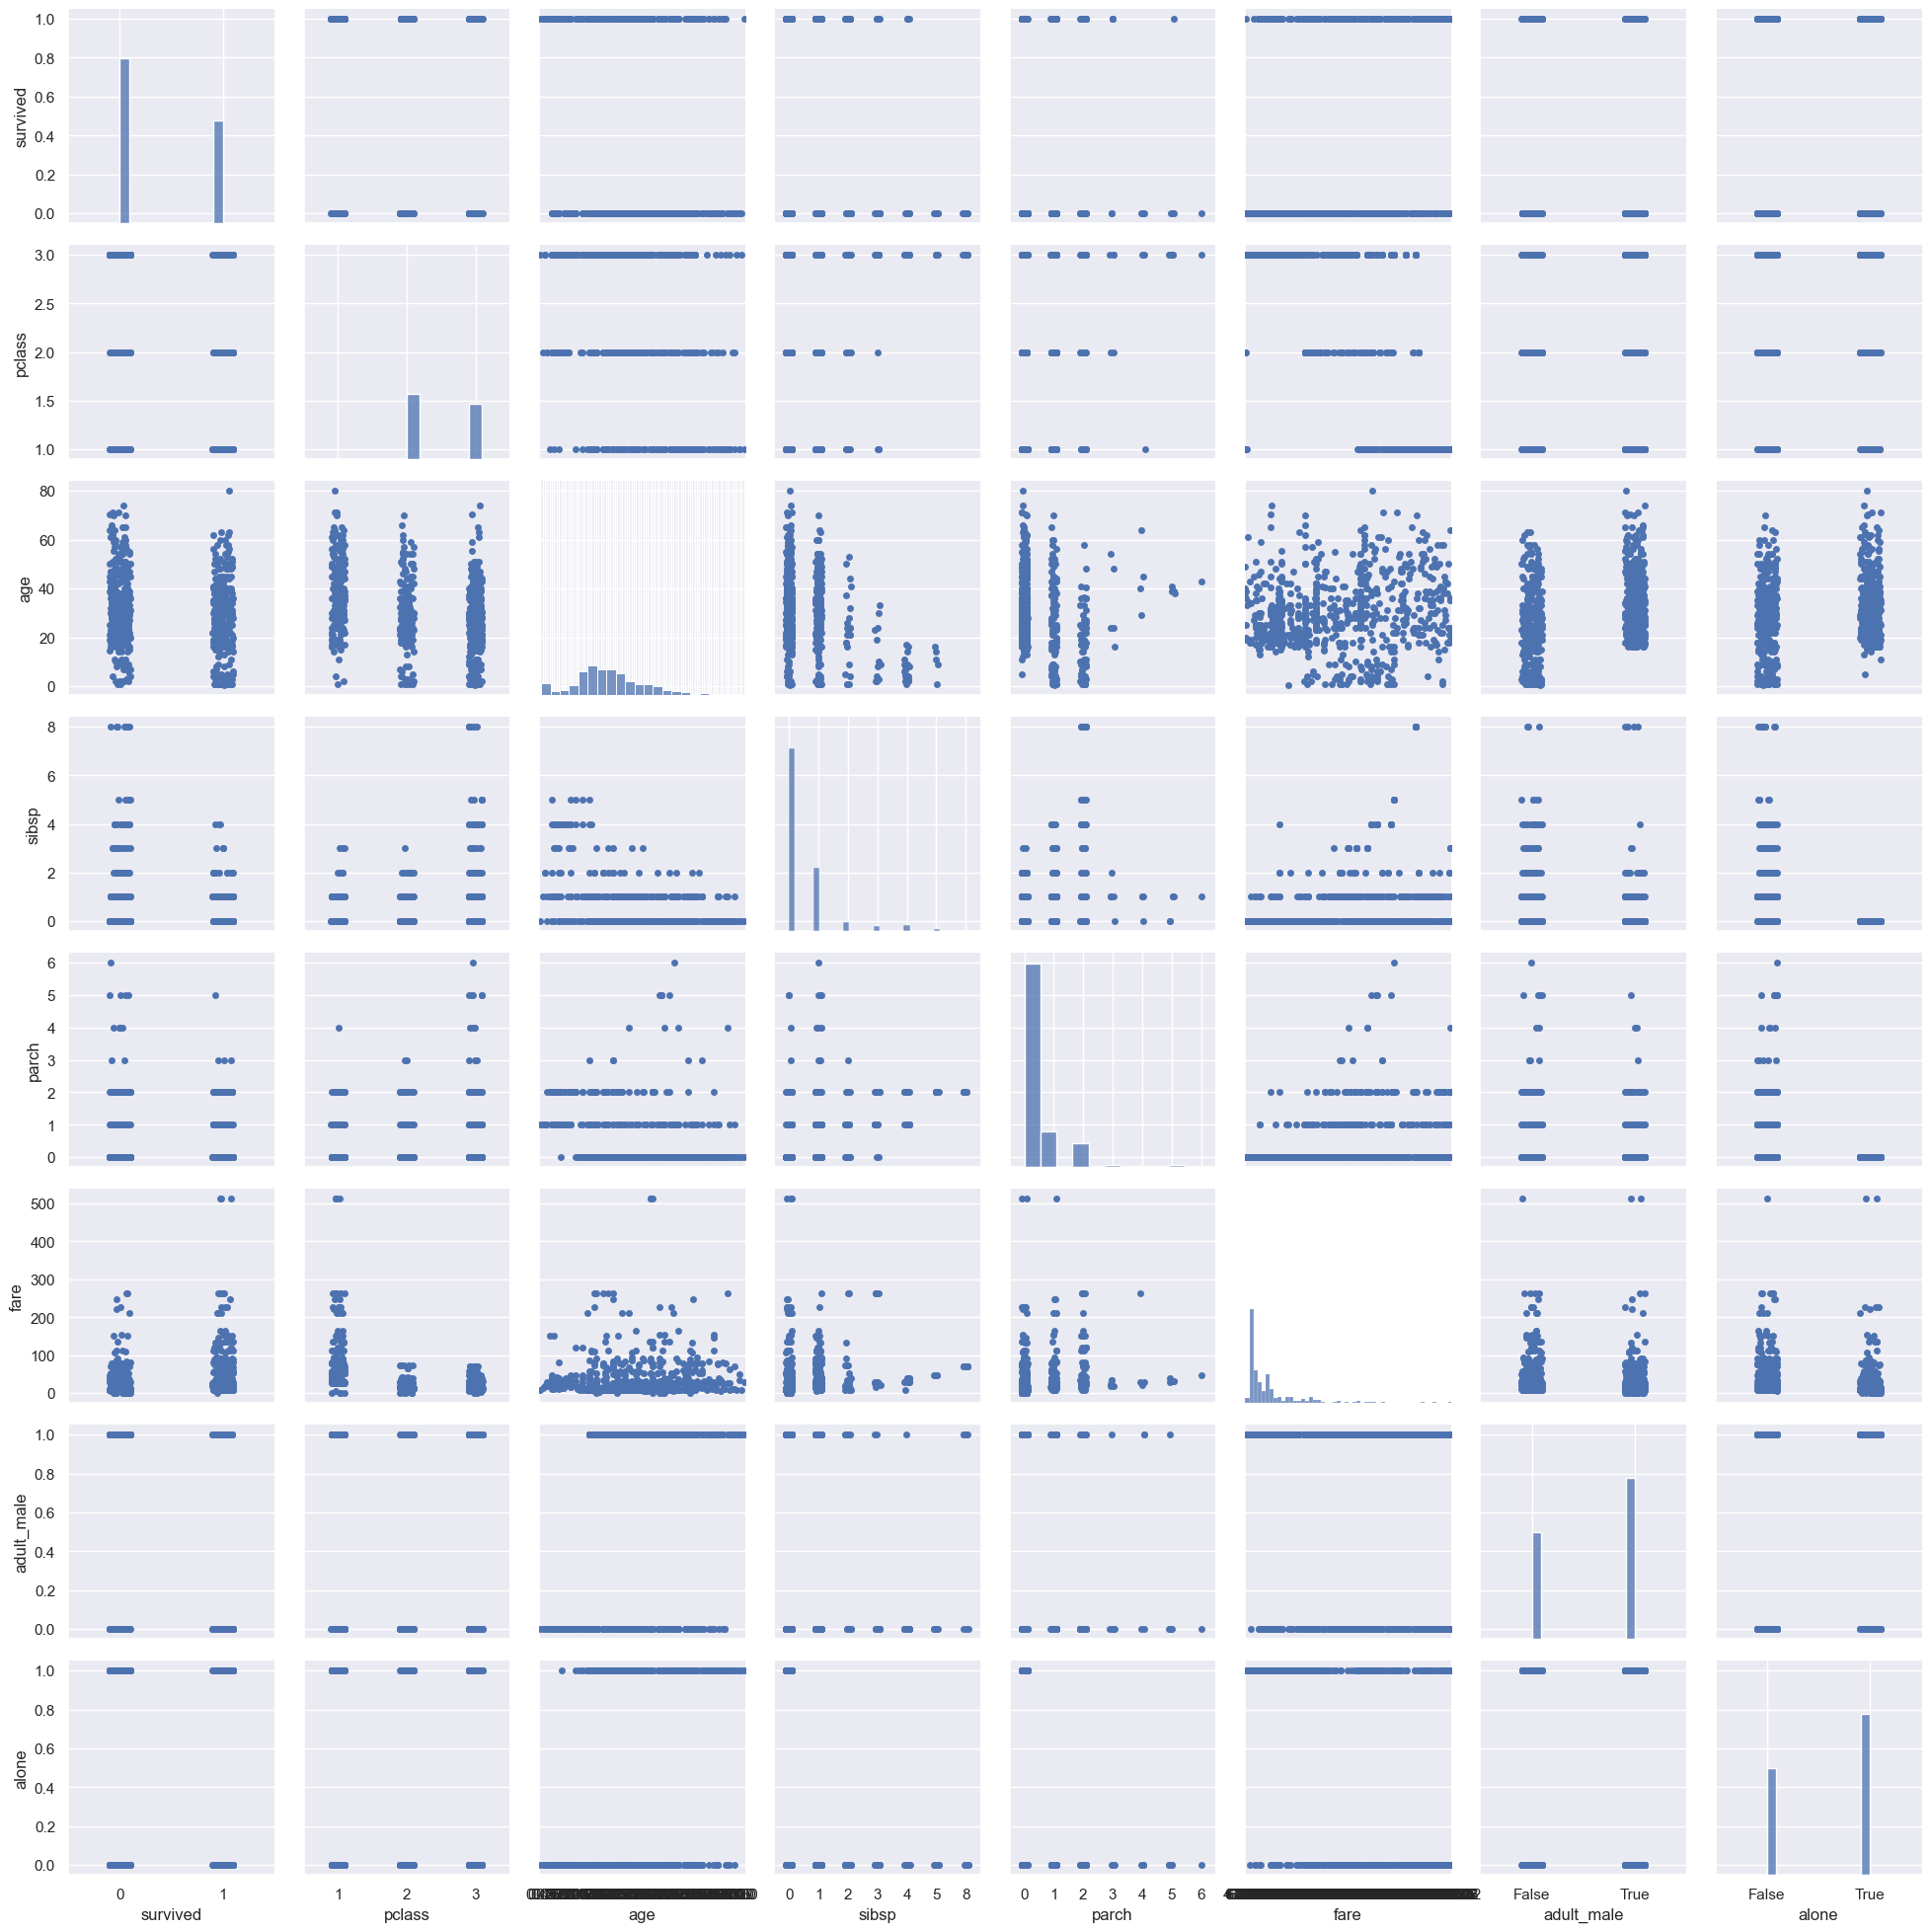

In [21]:
# More ways to customize PairGrid

g = sns.PairGrid(df) # Calling pointplot for the entire dataframe
g = g.map_diag(sns.histplot) # Secifying that the diagonal be a histogram
g.map_offdiag(sns.stripplot) # Secifying that off the diagonal show stripplots